<a href="https://colab.research.google.com/github/navnt00/DS/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [6]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:

df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [8]:
X = df.drop(['total'], axis =1)
y = df['total']


In [9]:

from sklearn.preprocessing import LabelEncoder
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:

model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)),
	keras.layers.Dense(512, activation='relu'),
	keras.layers.Dense(216, activation='relu'),
	keras.layers.Dense(1, activation='linear')
])


huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)


In [13]:

model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 3s 3ms/step - loss: 32.5311 - val_loss: 22.1025
Epoch 2/50
832/832 [==============================] - 3s 3ms/step - loss: 22.3853 - val_loss: 22.0101
Epoch 3/50
832/832 [==============================] - 3s 3ms/step - loss: 22.2606 - val_loss: 22.1179
Epoch 4/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2529 - val_loss: 22.0830
Epoch 5/50
832/832 [==============================] - 3s 3ms/step - loss: 22.2063 - val_loss: 22.2739
Epoch 6/50
832/832 [==============================] - 3s 3ms/step - loss: 22.1481 - val_loss: 21.8531
Epoch 7/50
832/832 [==============================] - 2s 3ms/step - loss: 22.1288 - val_loss: 21.7784
Epoch 8/50
832/832 [==============================] - 3s 3ms/step - loss: 22.0907 - val_loss: 21.8027
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.0827 - val_loss: 21.8317
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0904

<Axes: >

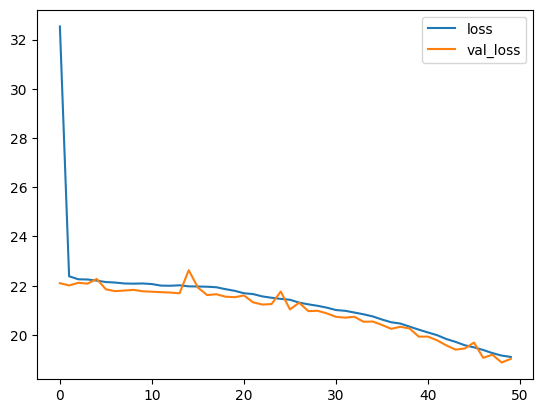

In [14]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [15]:

predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 1ms/step


19.518517839581893

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output()

		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [17]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()